In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Load the OCR dataset

# The MNIST dataset is a built-in dataset provided by Keras.
# It consists of 70,000 28x28 grayscale images, each of which displays a single handwritten digit from 0 to 9.
# The training set consists of 60,000 images, while the test set has 10,000 images.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


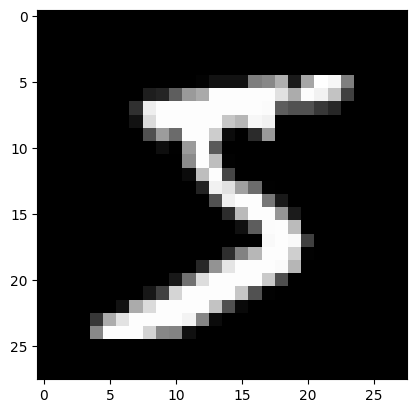

In [4]:
# X_train and X_test are our array of images while y_train and y_test are our array of labels for each image.
# The first tuple contains the training set features (X_train) and the training set labels (y_train).
# The second tuple contains the testing set features (X_test) and the testing set labels (y_test).
# For example, if the image shows a handwritten 7, then the label will be the intger 7.

plt.imshow(x_train[0], cmap='gray')  # imshow() function which simply displays an image.
plt.show() # cmap is responsible for mapping a specific colormap to the values found in the array that you passed as the first argument.



In [5]:
# image appears black and white and that each axis of the plot ranges from 0 to 28.

# This is because of the format that all the images in the dataset have:

# 1. All the images are grayscale, meaning they only contain black, white and grey.
# 2. The images are 28 pixels by 25 pixels in size (28x28).

print(x_train[0])

# image data is just an array of digits. You can almost make out a 5 from the pattern of the digits in the array.
# Array of 28 values
# a grayscale pixel is stored as a digit between 0 and 255 where 0 is black, 255 is white and values in between are different shades of gray.
# Therefore, each value in the [28][28] array tells the computer which color to put in that position when we display the actual image.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
# X: Training data of shape (n_samples, n_features)
# y: Training label values of shape (n_samples, n_labels)
# 2D array of height and width, 28 pixels by 28 pixels will just become 784 pixels (28 squared).
# Remember that X_train has 60,000 elemenets, each with 784 total pixels so will become shape (60000, 784).
# Whereas X_test has 10,000 elements, each with each with 784 total pixels so will become shape (10000, 784).

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.
x_test = x_test.astype('float32')
x_train /= 255  # Each image has Intensity from 0 to 255
x_test /= 255

# Regarding the division by 255, this is the maximum value of a byte (the input feature's type before the conversion to float32),
# so this will ensure that the input features are scaled between 0.0 and 1.0.
# USING svm-https://mgta.gmu.edu/courses/ml-with-python/handwrittenDigitRecognition.php#:~:text=Remember%20that%20X_train%20has%2060%2C0

In [8]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train]  # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] # f your particular categories is present then it mark as 1 else 0 in remain r

In [9]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))  # The input_shape argument is passed to the foremost layer. It comprises of a tuple shape,
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # for a multi-class classification problem
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
# Train the model
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
                    validation_data=(x_test, y_test)) # Using validation_data means you are providing the training set and validation set yourself,
                                                      # validation_split means you only provide a training set and keras splits it into a training set and a validation set


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8615 - loss: 0.4496 - val_accuracy: 0.9598 - val_loss: 0.1299
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9664 - loss: 0.1092 - val_accuracy: 0.9732 - val_loss: 0.0896
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9767 - loss: 0.0771 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9830 - loss: 0.0571 - val_accuracy: 0.9791 - val_loss: 0.0700
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9849 - loss: 0.0460 - val_accuracy: 0.9838 - val_loss: 0.0617
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9874 - loss: 0.0388 - val_accuracy: 0.9835 - val_loss: 0.0610
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9892 - loss: 0.0324 - val_accuracy: 0.9812 - val_loss: 0.0658
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9916 - loss: 0.0272 - 

In [12]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08312281966209412
Test accuracy: 0.9842000007629395
